# What makes the World happy

The **World Happiness Report** ranks countries by their happiness levels, based on factors like income, social support, life expectancy, freedom, and more.  
In this project, I analyze the 2019 dataset to understand what makes some countries happier than others, using Python for data analysis and visualization.


***1. Setup and Basic Exploration***

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn Style
sns.set(style="whitegrid")

# Load the Dataset
df = pd.read_csv('/kaggle/input/world-happiness/2019.csv')

# Quick Look at Data
df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


***2. Clean & Understand the Data***

In [2]:
# Check for missing values
df.isnull().sum()

# Basic stats
df.describe()

# Rename columns for easier access
df.rename(columns={
    'Country or region': 'Country',
    'GDP per capita': 'GDP',
    'Social support': 'Social',
    'Healthy life expectancy': 'LifeExpectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Corruption'
}, inplace=True)


***3. Top & Bottom 10 Happiest Countries***

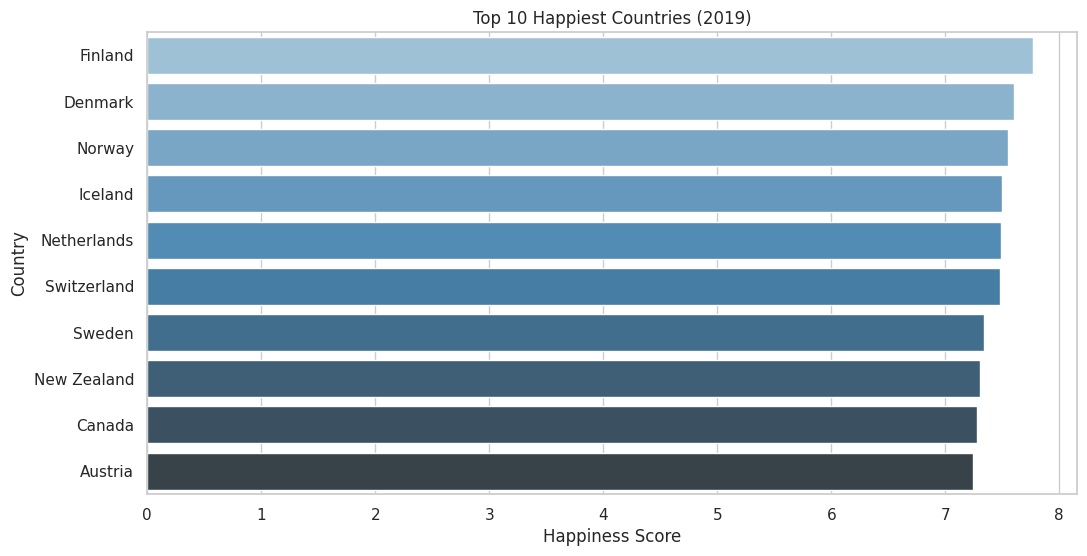

In [3]:
# Top 10 Happiest Countries
top10 = df.sort_values(by='Score', ascending=False).head(10)
bottom10 = df.sort_values(by='Score', ascending=True).head(10)

# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Country', data=top10, palette='Blues_d')
plt.title('Top 10 Happiest Countries (2019)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

***4. Correlation Between Factors***

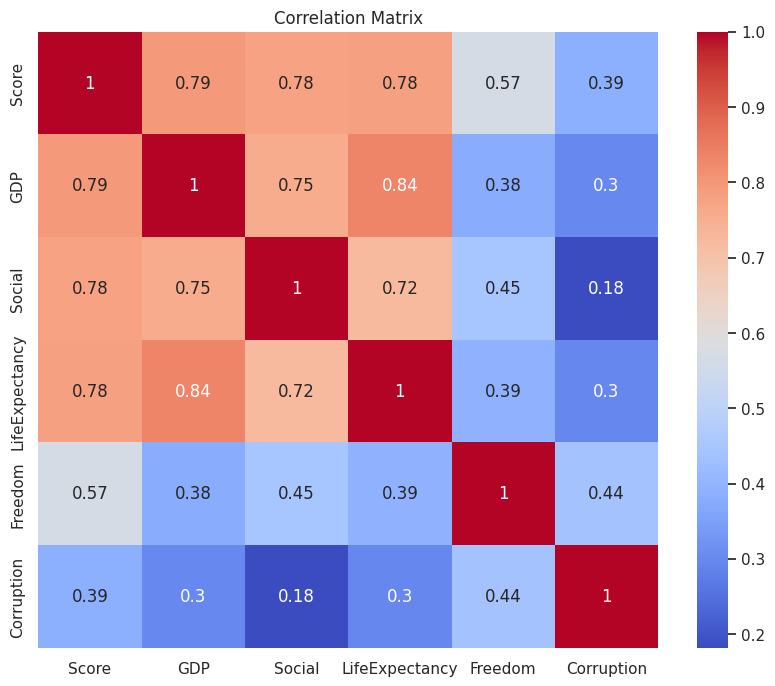

In [4]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Score', 'GDP', 'Social', 'LifeExpectancy', 'Freedom', 'Corruption']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

***5. Wrap-Up***

In [5]:
# Simple insights
print("Average Happiness Score:", df['Score'].mean())
print("Country with highest happiness:", df.loc[df['Score'].idxmax()]['Country'])
print("Country with lowest happiness:", df.loc[df['Score'].idxmin()]['Country'])

Average Happiness Score: 5.407096153846155
Country with highest happiness: Finland
Country with lowest happiness: South Sudan


***6. Project Summary: What Makes the World Happy?***

🔍 Objective:
This project analyzes the 2019 World Happiness Report to find which factors most influence happiness across countries.

📊 Key Insights:
The top 10 happiest countries include Finland, Denmark, and Norway.

The happiness score is strongly correlated with:

* GDP per capita (wealth)
* Social support
* Life expectancy

Countries with lower scores often had:

* Higher perceived corruption
* Lower economic output

📈 Visualizations:

* Bar charts showing the top & bottom 10 happiest countries
* A correlation heatmap highlighting key influencing factors 


***7. Save a Text Summary***

In [6]:
summary = """
World Happiness Report 2019 - Summary

Top 3 happiest countries:
1. Finland
2. Denmark
3. Norway

Key factors influencing happiness:
- GDP per capita
- Social support
- Life expectancy
"""

with open('/kaggle/working/happiness_summary.txt', 'w') as f:
    f.write(summary)

***8. Save a Plot as Image***

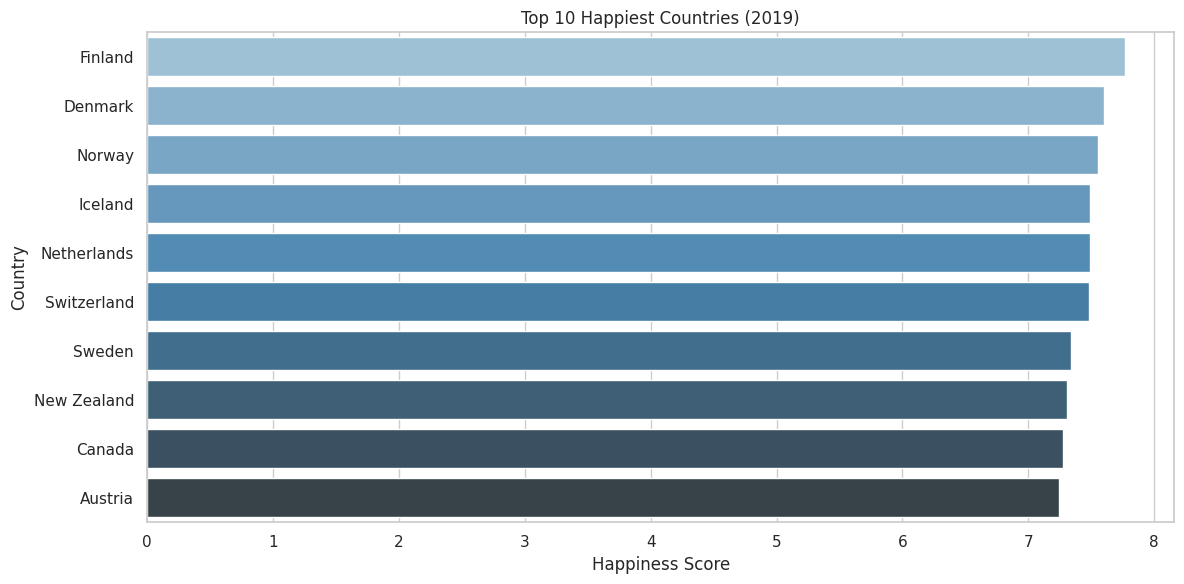

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Country', data=top10, palette='Blues_d')
plt.title('Top 10 Happiest Countries (2019)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('/kaggle/working/top10_happy_countries.png')  # <- saves image
plt.show()